In [1]:
import pandas as pd

#specify filepath and get it read with pd.read_csv; encoding is 'latin1'

filepath1 = 'C:\\Users\\anush\\Desktop\\McGill\\Dissertation\\POEMS\\'

meta = pd.read_csv(filepath1 + 'IGPOETRY.csv', encoding='latin1')
meta.head()

,ï»¿Title,Poet,Translator,PoemText,Month,Year
0,Everything will be remembered,Aamir Aziz,Anushree Joshi,"You write the night, we will write the moon.\n...",January,2020
1,There are the Girls of Jamia,Aamir Aziz,Yukti Saumya,"Exposing the Shahs of the world, \nWith their ...",January,2020
2,Untitled (with the caption #standwithUmarkhalid),Aamir Aziz,Anushree Joshi,I can be beaten and attacked anywhere\nAbandon...,September,2020
3,Untitled (with the caption Todayâs death!!!),Aamir Aziz,Anushree Joshi,Today again fresh blood flowed through the str...,December,2019
4,I refuse,Aamir Aziz,Anushree Joshi,You can shoot us with your bullets certainly\n...,January,2020


In [2]:
#flat_tweets = [item for sublist in just_tweets for item in sublist]
list = meta['PoemText'].tolist()
list
tryingstring=str(meta['PoemText'])
type(tryingstring)

str

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [4]:
sentences = []

#append each sentence here by sent_tokenize

for counter, item in enumerate(list):
    each_sentence = nltk.sent_tokenize(str(item))
    sentences.append(each_sentence)

In [5]:
sentences[0][0]

'You write the night, we will write the moon.'

In [6]:
#now open up this list of strings

sentences1 = [item for sublist in sentences for item in sublist]
sentences1

['You write the night, we will write the moon.',
 'You put us in jail, we will jump over the walls and still write.',
 'You file an FIR against us, we will write that we are ready to fight.',
 'You murder us, we will manifest as ghosts and still write.',
 'We will write the evidence of the murders you committed.',
 'And you enjoy writing jokes jokes in courts,\nWe will write justice on the roads and the walls.',
 'We will speak loud enough so even the deaf will listen\nWe will write clearly enough so even the blind may read.',
 'You symbolize the black lotus, we will write the red rose.',
 'You write tyranny on the earth\nWe will write revolution in the sky.',
 'Everything will be remembered, each and every thing will be remembered.',
 'And with your laathis and bullets,\nThe comrades of mine that you have murdered â\x80\x94\nIn their memory, we will keep our hearts wrecked.',
 'Everything will be remembered, each and every thing will be remembered.',
 'And you will write lies with ink

In [7]:
# FAST TOKENIZE function

def fast_tokenize(text):
    
    # Get a list of punctuation marks
    from string import punctuation
    
    # Iterate through text removing punctuation characters
    no_punct = "".join([char for char in text if char not in punctuation])
    
    # Split text over whitespace into list of words
    tokens = no_punct.split()
    
    return tokens

#we are working at the corpus level so we are not maintaining them by indices.

In [8]:
# Word tokenize now using fast_tokenize

words_by_sentence = [fast_tokenize(sentence.lower()) for sentence in sentences1]

In [9]:
# Inspect # Sanity check #looks like it works

words_by_sentence[6], len(words_by_sentence)

(['we',
  'will',
  'speak',
  'loud',
  'enough',
  'so',
  'even',
  'the',
  'deaf',
  'will',
  'listen',
  'we',
  'will',
  'write',
  'clearly',
  'enough',
  'so',
  'even',
  'the',
  'blind',
  'may',
  'read'],
 193)

In [10]:
# Vectorize texts

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation #our version of sklearn should recognize this

import pandas as pd
import codecs
import numpy as np


In [11]:
tf_vectorizer = CountVectorizer(stop_words='english')
tf = tf_vectorizer.fit_transform(sentences1)
tf_feature_names = tf_vectorizer.get_feature_names()

tf_feature_names

['56',
 '90s',
 'abandoned',
 'abruptly',
 'absolutely',
 'abuse',
 'abuses',
 'abusing',
 'abvp',
 'acceptable',
 'accountability',
 'acted',
 'actor',
 'adam',
 'adieu',
 'administrationâ',
 'affects',
 'afford',
 'afraid',
 'againâ',
 'age',
 'agent',
 'agony',
 'ahead',
 'alive',
 'allah',
 'almighty',
 'alms',
 'aloud',
 'altogetherâ',
 'ambedkar',
 'amidst',
 'anchor',
 'anger',
 'anguished',
 'announce',
 'annoy',
 'answer',
 'anthem',
 'anticipating',
 'antinationalists',
 'anybodyâ',
 'anymore',
 'anytime',
 'appear',
 'approaching',
 'apt',
 'arches',
 'aren',
 'arena',
 'arms',
 'arrest',
 'arrested',
 'arrests',
 'art',
 'aside',
 'ask',
 'asked',
 'asking',
 'atrocities',
 'attack',
 'attacked',
 'attackedâ',
 'attackersâ',
 'attacking',
 'attention',
 'audacious',
 'authenticity',
 'away',
 'axisâ',
 'azadi',
 'bad',
 'bagh',
 'balanced',
 'balls',
 'bang',
 'bangla',
 'bareilly',
 'barricades',
 'based',
 'batons',
 'bear',
 'beard',
 'beat',
 'beaten',
 'beating',
 'bea

In [12]:
# Run Topic model

lda = LatentDirichletAllocation(15, max_iter=20000, # first parameter # OF TOPICS, YOU DECIDE
                                learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [13]:
# Next process

lda_W = lda.transform(tf)
lda_H = lda.components_

In [14]:
# Next get top words + top docs by topic
#dtm = document TOPIC matrix here instead of terms

def display_topics(H, W, feature_names, documents, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(H):
        ("Topic %d:" % (topic_idx))
        topics.append((("Topic %d:" % (topic_idx)), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])))
        
    return topics
            
no_top_words = 20 # this is arbitrary decided by the USER, YOU DECIDE

topics = display_topics(lda_H, lda_W, tf_feature_names, tf, no_top_words)
topics

#There is a clear connection between these when we do topics = 15 or topics = 20 as topic 0 links the idea of documenting abuse and humiliation, and how it is deeply embedded in belongingness
#'government' occurs like 15% of the time in the brackets of tyranny and visceral relations to tyranny through crucifixion, sticks, etc.


[('Topic 0:',
  'belong deep explain ll tell nation rememberedâ iâ abuses sexist slang slurs humiliate bus round river khalid umar bound dream'),
 ('Topic 1:',
  'people liberal donâ oh time just ve beloved youâ remember blood rights need got itâ heart sticks country streets feel'),
 ('Topic 2:',
  'write government mustnâ burnt buses jokes tyranny enjoy earth arrested revolution police courts writing attack dismissed justice evidence committed sky'),
 ('Topic 3:',
  'ordinariness belongs refuse haman bullets thatâ necessary step oblivion terrified hoarder robber tyranny stones openly bottles stabbed minds pelted closed'),
 ('Topic 4:',
  'like mother muslim glory india crime hunger spread yes men illness locusts relent refusing hours seminar organized antinationalists colossal invited'),
 ('Topic 5:',
  'silent tell home love names effigies burning near heat sandstone country say day mother sister black road hold tantrums colony'),
 ('Topic 6:',
  'canâ identity need hands older shahe

In [15]:
#lda, tf, tf_vectorizer
#pyLDAvis results -- WORKS
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
vis

D:\ANACONDA\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.257808  0.005979       1        1  18.554467
6     -0.068145 -0.167123       2        1   9.605357
7      0.029286 -0.110175       3        1   8.864028
10    -0.099223  0.044596       4        1   8.053694
12    -0.016952  0.095904       5        1   7.015957
2     -0.014563 -0.019230       6        1   7.009567
11     0.001314  0.048477       7        1   6.914690
13    -0.027262  0.091787       8        1   6.900546
8     -0.036367  0.074531       9        1   6.454400
3      0.016586  0.001918      10        1   4.772678
5     -0.009830  0.008100      11        1   4.150225
14    -0.013598 -0.101368      12        1   3.404086
0      0.003477  0.024791      13        1   3.317885
9      0.003800 -0.005070      14        1   2.517588
4     -0.026328  0.006882      15        1   2.464832, topic_info=         Term       Freq      Total Category  logprob  loglift
792    people  54.000000  54.000000  Default  30.0000  30.0000
637   liberal  16.000000  16.000000  Default  29.0000  29.0000
663     lover   8.000000   8.000000  Default  28.0000  28.0000
898     right  11.000000  11.000000  Default  27.0000  27.0000
1231    write  15.000000  15.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
557     india   1.062192   5.351870  Topic15  -3.8972   2.0859
668      make   0.542755   2.115501  Topic15  -4.5686   2.3427
705    mother   1.062192   5.832864  Topic15  -3.8972   1.9999
545    hunger   0.542755   2.835812  Topic15  -4.5686   2.0496
1237      yes   0.542755   3.479167  Topic15  -4.5686   1.8452

[713 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  0.621623          56
1        15  0.886880         90s
4         1  0.971525  absolutely
5         5  0.685321       abuse
6         4  0.555503      abuses
...     ...       ...         ...
1237      4  0.287425         yes
1237      7  0.287425         yes
1237     15  0.287425         yes
1239      1  0.599869        youâ
1239      6  0.299934        youâ

[746 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 8, 11, 13, 3, 12, 14, 9, 4, 6, 15, 1, 10, 5])

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


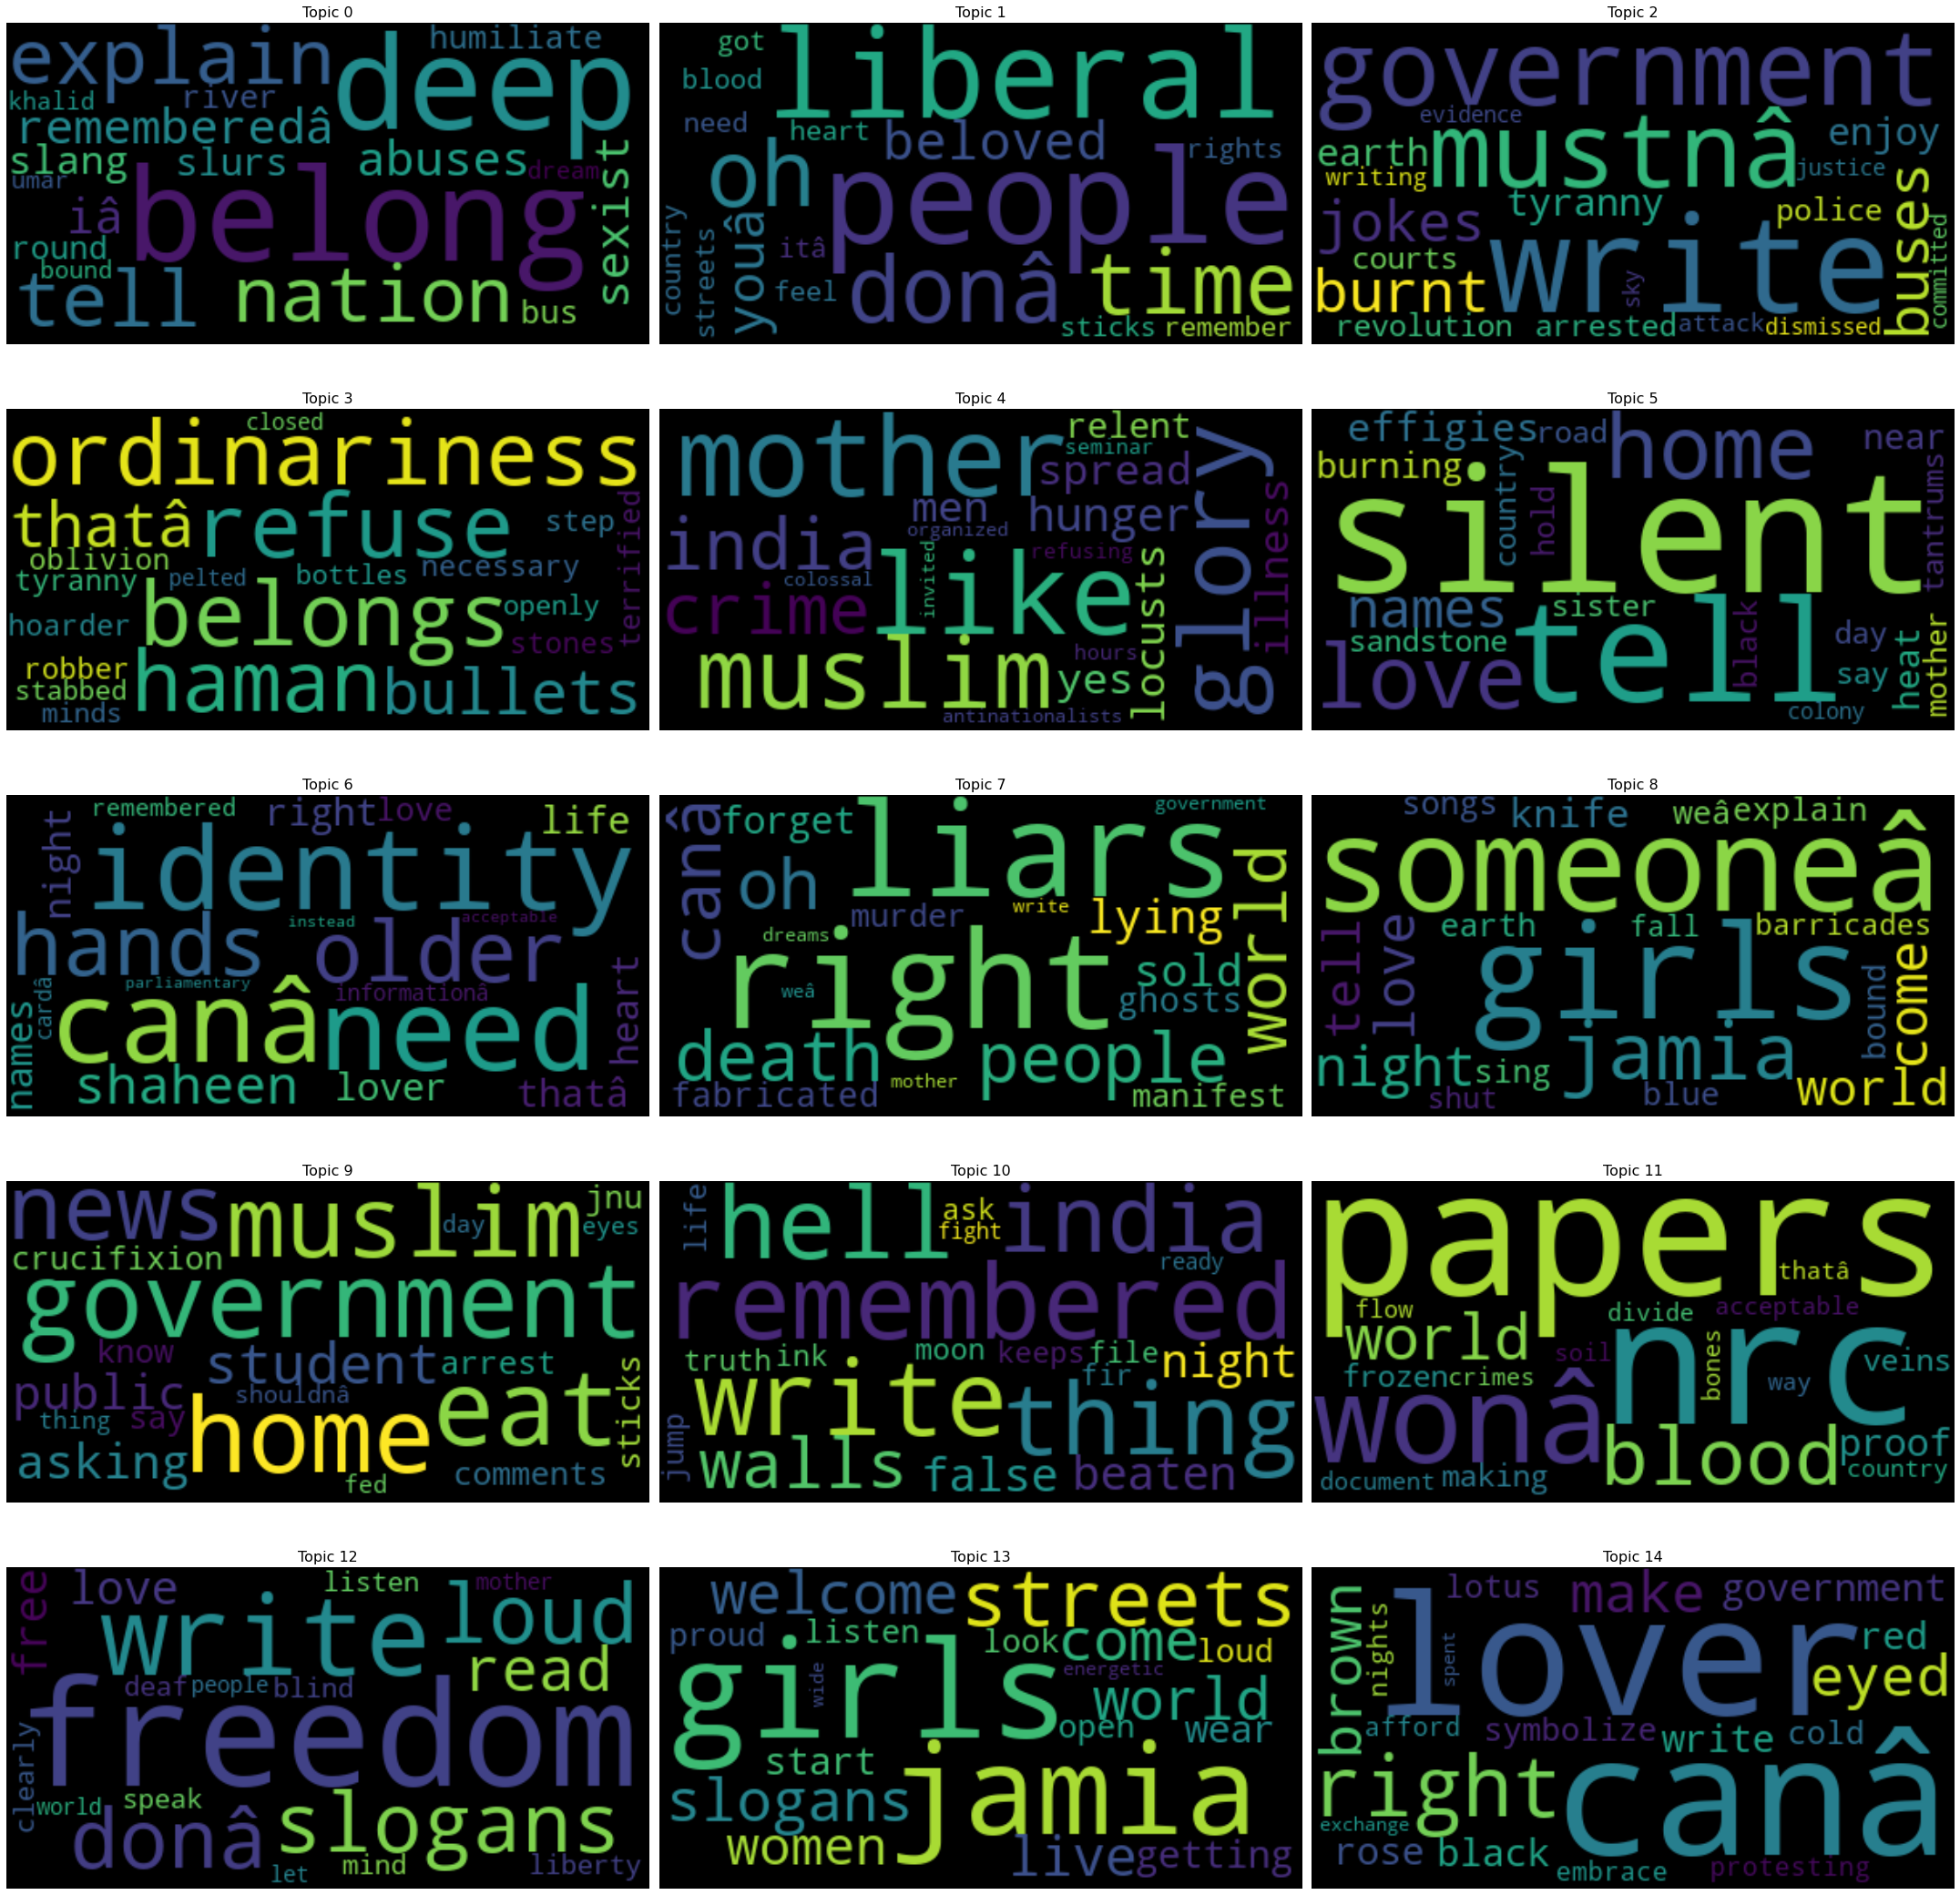

In [16]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = ['i', "of", "the", "will", "https", "amp", "http", "a", "is", "in", "on", "it", "to", "that", "be", "not", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = set(STOPWORDS)
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=25,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

#topics1 = lda_H.show_topics(formatted=False)

fig, axes = plt.subplots(5, 3, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #topic_words = dict(topics[0][1])
    #cloud.generate_from_frequencies(topic_words, max_font_size=300)
    wordcloud = WordCloud(stopwords=stopwords).generate(topics[i][1])
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [80]:
#now do word2vec from 31 Oct.
!pip install wordcloud

In [81]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


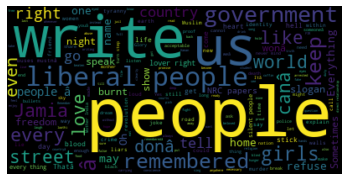

In [82]:
#trying wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
# Create stopword list:
STOPWORDS = ['i', "of", "the", "will", "a", "is", "in", "on", "it", "to", "that", "be", "not", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = set(STOPWORDS)
#stopwords.update(["br", "href"])

textt = " ".join(poem for poem in meta.PoemText)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_thesis.png')
plt.show()

In [83]:

#do emotion association stuff from hate speech paper

In [84]:
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests

In [85]:
!pip install -U LeXmo
from LeXmo import LeXmo

In [87]:
#https://betterprogramming.pub/unlocking-emotions-in-text-using-python-6d062b48d71f
emo=LeXmo.LeXmo(textt)

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /dinbav/LeXmo/master/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002350FE72340>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [29]:
print(emo)

{'text': 'You write the night, we will write the moon.\nYou put us in jail, we will jump over the walls and still write.\nYou file an FIR against us, we will write that we are ready to fight.\nYou murder us, we will manifest as ghosts and still write.\nWe will write the evidence of the murders you committed.\n\nAnd you enjoy writing jokes jokes in courts,\nWe will write justice on the roads and the walls.\nWe will speak loud enough so even the deaf will listen\nWe will write clearly enough so even the blind may read.\n\nYou symbolize the black lotus, we will write the red rose.\nYou write tyranny on the earth\nWe will write revolution in the sky.\n\nEverything will be remembered, each and every thing will be remembered.\nAnd with your laathis and bullets,\nThe comrades of mine that you have murdered â\x80\x94\nIn their memory, we will keep our hearts wrecked.\nEverything will be remembered, each and every thing will be remembered.\n\nAnd you will write lies with ink\nWe know that wellâ

In [30]:
#now visualization
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust'] 
degrees = [0.021596606247589665, 0.018125723100655612, 0.01600462784419591, 0.023717701504049362, 0.021596606247589665, 0.04492865406864636, 0.04107211723871963, 0.022560740455071344, 0.011376783648283841, 0.029695333590435788]
#Now GRAPH this shit

#Limitations of sentiment analysis in tweets and poems: the positivity or negativity could be about the government, i.e. status quo or the protesters
#but in this case, the wordcloud shows words used in relation positively to protesters

In [88]:
import matplotlib.pyplot as plt

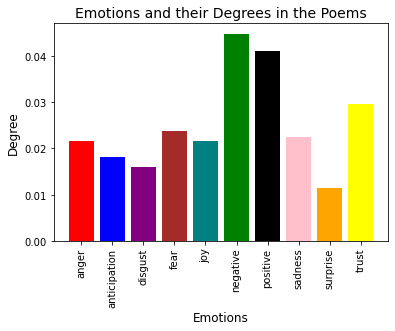

In [89]:
colors = ['red', 'blue', 'purple', 'brown', 'teal', 'green', 'black', 'pink', 'orange', 'yellow']
plt.bar(emotions, degrees, color=colors)
plt.title('Emotions and their Degrees in the Poems', fontsize=14)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Degree', fontsize=12)
# changing the rc parameters and plotting a line plot
plt.xticks(rotation=90)
plt.figure
#plt.rcParams['figure.figsize'] = [5, 5]
#plt.figure(figsize=(20, 20))
plt.show()

In [90]:
# Importing VADER from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()

# Apply polarity_score method of SentimentIntensityAnalyzer()
meta['sentiment'] = meta['PoemText'].apply(lambda x: sid.polarity_scores(x))

# Keep only the compound scores under the column 'Sentiment'
meta = pd.concat([meta.drop(['sentiment'], axis = 1), meta['sentiment'].apply(pd.Series)], axis = 1)

In [91]:
meta.head()

,ï»¿Title,Poet,Translator,PoemText,Month,Year,neg,neu,pos,compound
0,Everything will be remembered,Aamir Aziz,Anushree Joshi,"You write the night, we will write the moon.\nYou put us in jail, we will jump over the walls and still write.\nYou file an FIR against us, we will write that we are ready to fight.\nYou murder us, we will manifest as ghosts and still write.\nWe will write the evidence of the murders you committed.\n\nAnd you enjoy writing jokes jokes in courts,\nWe will write justice on the roads and the walls.\nWe will speak loud enough so even the deaf will listen\nWe will write clearly enough so even the blind may read.\n\nYou symbolize the black lotus, we will write the red rose.\nYou write tyranny on the earth\nWe will write revolution in the sky.\n\nEverything will be remembered, each and every thing will be remembered.\nAnd with your laathis and bullets,\nThe comrades of mine that you have murdered â\nIn their memory, we will keep our hearts wrecked.\nEverything will be remembered, each and every thing will be remembered.\n\nAnd you will write lies with ink\nWe know that wellâ\nBe it so with our blood, the truth will absolutely be written.\n\nEverything will be remembered, each and every thing will be remembered.\nAnd the blockades on mobile, telephone, internet in broad daylight,\nAnd confining the entire city in the cold, dark night,\nAnd abruptly invading my home with hammers,\nDevastating the entirety of this small world of mine,\nMurdering a piece of my heart in the middle of a crossroads,\nAnd then smiling with no disguise, standing amidst the crowdâ\nEverything will be remembered, each and every thing will be remembered.\n\nAnd you sweet talk in front of the world during the day,\nTelling them everything is fine with a stuttering tongue,\nCome night-time, you hit with sticks\nThe people who demand their rights.\nShooting us, attacking us, and then calling us the attackersâ\nEverything will be remembered, each and every thing will be remembered.\n\nAnd I will document the proof of these crimes on my bones\nI will document the proof of these crimes on my bones\nSince you demand from me the proof of my existence.\nThe proof of my being will certainly be given to you\nThis war will be fought till your very last breathâ\nEverything will be remembered, each and every thing will be remembered.\n\nThey will also be rememberedâ\nThe countless ways you conspired to break the nation\nThey will also be rememberedâ\nThe endless endeavours we made to dream of uniting the nation.\nAnd whenever the world speaks of the era of cowardice,\nYour deeds will be remembered.\n\nAnd whenever the world speaks of the commemoration of life,\nOur names will be rememberedâ\nThat there were some people whose will could not be broken with iron hammers,\nThat there were some people whose conscience could not be sold\nAt the price of pennies to the highest bidders, unlike yours has been sold,\nThat there were some people who stood strong,\nEven after the passing of the storm.\nThat there were some people who stayed alive,\nEven after receiving the news of their death.\nThe eyes may forget to blink,\nThe earth may forget to revolve at its axisâ\nThe flight of our clipped wings,\nThe voice of our sore throats will be remembered.\n\nYou write the night, we will write the moon.\nYou put us in jail, we will jump over the walls and still write.\nYou file an FIR against us, we will write that we are ready to fight.\nYou murder us, we will manifest as ghosts and still write.\nWe will write the evidence of the murders you committed.\n\nAnd you enjoy writing jokes jokes in courts,\nWe will write justice on the roads and the walls.\nWe will speak loud enough so even the deaf will listen\nWe will write clearly enough so even the blind may read.\n\nYou symbolize the black lotus, we will write the red rose.\nYou write tyranny on the earth\nWe will write revolution in the sky.\n\nEverything will be remembered, each and every thing will

In [92]:
# Focus on 'compound' scores
# Create a new column called 'sentiment_class'
sentimentclass_list = []
for i in range(0, len(meta)):
    
    # current 'compound' score:
    curr_compound = meta.iloc[i,:]['compound']
    
    if (curr_compound <= 1.0 and curr_compound >= 0.55):
        sentimentclass_list.append(5)
    elif (curr_compound < 0.55 and curr_compound >= 0.10):
        sentimentclass_list.append(4)
    elif (curr_compound < 0.10 and curr_compound > -0.10):
        sentimentclass_list.append(3)
    elif (curr_compound <= -0.10 and curr_compound > -0.55):
        sentimentclass_list.append(2)
    elif (curr_compound <= -0.55 and curr_compound >= -1.00):
        sentimentclass_list.append(1)
# Add the new column 'sentiment_class' to the dataframe
meta['sentiment_class'] = sentimentclass_list
# Verify if the classification assignment is correct:
meta.iloc[0:5, :][['compound', 'sentiment_class']]

,compound,sentiment_class
0,-0.9685,1
1,-0.3732,2
2,-0.9776,1
3,0.6351,5
4,-0.7584,1


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


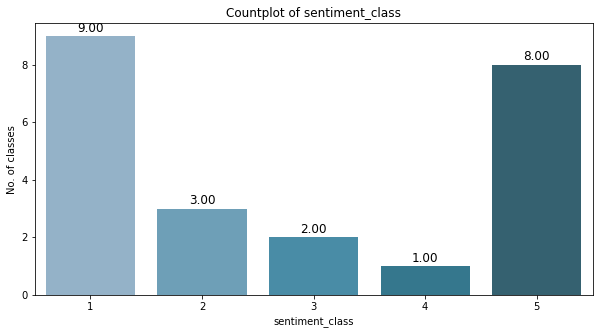

In [94]:
import seaborn as sns
# Distribution of sentiment_class
plt.figure(figsize = (10,5))
sns.set_palette('PuBuGn_d')
plots = sns.countplot(meta['sentiment_class'])
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Countplot of sentiment_class')
plt.xlabel('sentiment_class')
plt.ylabel('No. of classes')
plt.show()

In [95]:
len(meta)

23

In [42]:
# Display full text in Jupyter notebook:
pd.set_option('display.max_colwidth', -1)
# Look at some examples of negative, neutral and positive tweets
# Filter negative original poems:
print("Random negative original poems and their sentiment classes:")
meta[(meta['sentiment_class'] == 1) | (meta['sentiment_class'] == 2)][['PoemText', 'sentiment_class']]

Random negative original poems and their sentiment classes:


C:\Users\anush\AppData\Local\Temp/ipykernel_4924/3872862725.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,PoemText,sentiment_class
0,"You write the night, we will write the moon.\nYou put us in jail, we will jump over the walls and still write.\nYou file an FIR against us, we will write that we are ready to fight.\nYou murder us, we will manifest as ghosts and still write.\nWe will write the evidence of the murders you committed.\n\nAnd you enjoy writing jokes jokes in courts,\nWe will write justice on the roads and the walls.\nWe will speak loud enough so even the deaf will listen\nWe will write clearly enough so even the blind may read.\n\nYou symbolize the black lotus, we will write the red rose.\nYou write tyranny on the earth\nWe will write revolution in the sky.\n\nEverything will be remembered, each and every thing will be remembered.\nAnd with your laathis and bullets,\nThe comrades of mine that you have murdered â\nIn their memory, we will keep our hearts wrecked.\nEverything will be remembered, each and every thing will be remembered.\n\nAnd you will write lies with ink\nWe know that wellâ\nBe it so with our blood, the truth will absolutely be written.\n\nEverything will be remembered, each and every thing will be remembered.\nAnd the blockades on mobile, telephone, internet in broad daylight,\nAnd confining the entire city in the cold, dark night,\nAnd abruptly invading my home with hammers,\nDevastating the entirety of this small world of mine,\nMurdering a piece of my heart in the middle of a crossroads,\nAnd then smiling with no disguise, standing amidst the crowdâ\nEverything will be remembered, each and every thing will be remembered.\n\nAnd you sweet talk in front of the world during the day,\nTelling them everything is fine with a stuttering tongue,\nCome night-time, you hit with sticks\nThe people who demand their rights.\nShooting us, attacking us, and then calling us the attackersâ\nEverything will be remembered, each and every thing will be remembered.\n\nAnd I will document the proof of these crimes on my bones\nI will document the proof of these crimes on my bones\nSince you demand from me the proof of my existence.\nThe proof of my being will certainly be given to you\nThis war will be fought till your very last breathâ\nEverything will be remembered, each and every thing will be remembered.\n\nThey will also be rememberedâ\nThe countless ways you conspired to break the nation\nThey will also be rememberedâ\nThe endless endeavours we made to dream of uniting the nation.\nAnd whenever the world speaks of the era of cowardice,\nYour deeds will be remembered.\n\nAnd whenever the world speaks of the commemoration of life,\nOur names will be rememberedâ\nThat there were some people whose will could not be broken with iron hammers,\nThat there were some people whose conscience could not be sold\nAt the price of pennies to the highest bidders, unlike yours has been sold,\nThat there were some people who stood strong,\nEven after the passing of the storm.\nThat there were some people who stayed alive,\nEven after receiving the news of their death.\nThe eyes may forget to blink,\nThe earth may forget to revolve at its axisâ\nThe flight of our clipped wings,\nThe voice of our sore throats will be remembered.\n\nYou write the night, we will write the moon.\nYou put us in jail, we will jump over the walls and still write.\nYou file an FIR against us, we will write that we are ready to fight.\nYou murder us, we will manifest as ghosts and still write.\nWe will write the evidence of the murders you committed.\n\nAnd you enjoy writing jokes jokes in courts,\nWe will write justice on the roads and the walls.\nWe will speak loud enough so even the deaf will listen\nWe will write clearly enough so even the blind may read.\n\nYou symbolize the black lotus, we will write the red rose.\nYou write tyranny on the earth\nWe will write revolution in the sky.\n\nEverything will be remembered, each and every thing will be remembered.\n\nSo that your names could be damned forever,\nSo that your effigies could be sm

In [43]:
# Filter 10 neutral original poems:
print("Random neutral original poems and their sentiment classes:")
meta[(meta['sentiment_class'] == 3)][['PoemText', 'sentiment_class']]

Random neutral original poems and their sentiment classes:


,PoemText,sentiment_class
15,"wings sharp as sickles\n\nneedle-sighted birds\nolder than Gilgamesh\n\nolder than all kings\n\nseeing\nfurther than any of us,\nthrough dust and\ndarkness, and lies\n\nhawk-eyed\nfathoming all skies\n\ncatching in their arms\nwhat our hands cannot reach,\nwhat we hunger for\n\nclawing at every night\nprophetic, brave\ngiving flight\n\nmoving flames\nof the sky\n\nknown by many names,\none: ""the royal white falcon"" is\n\nShaheen\n\nthe bird that leads to victory",3
16,I was born\nto Hindu parents\n\nin a Bareilly hospital\nset up by a Christian missionary\n\non land gifted to her\nby a Muslim prince.\n\nWe are made of each other.,3


In [44]:
# Filter 20 positive original poems:
print("Random positive original poems and their sentiment classes:")
meta[(meta['sentiment_class'] == 4) | (meta['sentiment_class'] == 5)][['PoemText', 'sentiment_class']]

Random positive original poems and their sentiment classes:


,PoemText,sentiment_class
3,"Today again fresh blood flowed through the streets\nFor you, this fresh blood flowed through the streets\n\nYou drink it up!\nDrink it up till you feel full!\n\nPerhaps the blood frozen in your veins will flow again\nPerhaps your conscience that has become mum\nSpeaks up again",5
5,"Dictators will come and go\nThe NRC papers, we wonât show.\n\nYou blind us with tear gas\nYou poison our waters\nThat we will sweeten with love\nAnd weâll drink it all in a go\nThe NRC papers, we wonât show.\n\nThis nation is all we got\nWhere Ram Prasad is also Bismil\nHow will you divide the motherland\nThat has the blood and sacrifice of every Indian\nRaise your batons all you can\nShut down every road you can\nWe will walk, we will flow\nThe NRC papers, we wonât show.\n\nWe will pitch our tents here\nThe NRC papers, we wonât show.\n\nWe will save the Constitution before we go\nThe NRC papers, we wonât show.\n\nWe will sing the national anthem for sure\nThe NRC papers, we wonât show.\n\nYou will try to divide us by caste and religion\nUnited, we will ask for food and truth\nThe NRC papers, we wonât show\nThe NRC papers, we wonât show.",5
6,"My country is burning\nYes, our country is burning\nGo on, announce it on every street and crossroads\nThat our burnt countryâs funeral procession is about to begin\nAnd the coffin is being carried by\nThe silent people from one end\nWell-educated silent people\nPrivileged upper-caste silent people\nThe rich, the wealthy silent people\nActor director silent people\nCEO bureaucrats silent people\nRatify every bill silent people.\n\nThe liars shoulder the coffin from the other endâ\nVC Registrar lying people\nNewsreader journalist lying people\nTV and newspaper liars\nIT entrepreneurs liars\nThe liars of this crony government\nNaive innocent helpless liars\nReady with the sticks liars.\n\nThe liberals shoulder the coffin from the third end\nBalanced centrist liberal people\nâDonât get hyperâ liberal people\nPeople with intelligent questions, liberal people\nâI donât understand CABâ liberal people\nâPlis to explainâ liberal people\n""We don't see how it affects you"" liberal people\nOur friends, our pals, those liberal people\nExtended relatives of the Sangh Dynasty liberal people\nDescendants of Savarkar liberal people\n""The government cannot do this, my pal"" liberal people\nThe leaders of jargon, liberal people\nMy thoughts sway with but-ifs, liberal people\nTreacherous, deceiving liberal people\nâBut even the police was attackedâ liberal people\nâGenocide is very farâ liberal people\nâThese students donât study, my palâ liberal people\nâProtests are fully futileâ liberal people\nâWhataboutery is my weaponâ liberal people\nâWe prefer civilityâ liberal people\nâExplain the nitty grittyâ liberal people\nMildly communal liberal people\nMostly millennial liberal people.\n\nFor the fourth leg, the countryâs system\nThe officials of these courts people\nPoliticians, ministers, business people\nObedient in their uniforms people\nFacebook and Twitter expert people\nTheir bribed unemployed people\nThrone and crown carrying courtier people\nAbusing cultured people\nParliamentâs prominent people\nContractors of the Constitution people\nRotten vegetable people\nWorshippers of fake news people\nParticipants of their people\nStick-carrying anticipating people\nThose who are all set to unleash people.\n\nBut to extinguish the fire\nThat burns this country\nHere they come on the streets\nRaised fingers\nShouting slogans\nSparking hope\nSinging songs\nWomen.\nHeads covered, or hair undone\nCarrying flags\nMaking noise, breaking barricades\nPlayfully teasing the patriarchal rulers\nBeware of us women!\nHear us roar, donât you dare!\nA new dawn will break for sure\nThe tyrannous ritual will turn for sure\n\nSee, here they are on the streetsâ\nThunderstorm people\nSunshine people\nFearless people\nPriceless people\nOh, these

In [45]:
#Now continue working further with this: https://github.com/leowgriffin/tweets_analysis_hkprotests_2019/blob/master/sahkprotests_analysis.ipynb
#and this: https://towardsdatascience.com/analysis-of-tweets-on-the-hong-kong-protest-movement-2019-with-python-a331851f061
#Now compare this shit with TWEET CORPUS

In [74]:
# Train word2vec using CBOW
#create a model with gensim.models.Word2Vec, add parameters
#removed batch_words from this

import gensim
model = gensim.models.Word2Vec(words_by_sentence, window=5, min_count=2, sg=0, alpha=0.025)

In [75]:
#get an array of similarity scores in relation to 'trump'
#remember to mention words in lowercase because tokenization has removed uppercase

model.wv['people']

array([ 1.78439950e-03,  2.16125939e-02,  1.05806971e-02,  8.13146960e-03,
        8.61652836e-04, -4.32037190e-02,  3.25889811e-02,  5.77400438e-02,
       -2.86454409e-02, -2.96928622e-02,  3.50402412e-03, -3.25633362e-02,
       -2.35478394e-03,  2.13199239e-02,  2.02702335e-03, -1.51056349e-02,
        2.53383052e-02, -1.68236736e-02, -1.85108632e-02, -7.44905025e-02,
        1.79281160e-02,  8.48628953e-03,  3.32818814e-02, -1.47495717e-02,
       -1.45996055e-02,  1.06979357e-02, -2.45442875e-02, -2.16776524e-02,
       -1.87818334e-02,  4.42948146e-03,  2.69554034e-02,  1.50022721e-02,
        2.06548236e-02, -1.93726420e-02, -2.54476164e-02,  3.83016281e-02,
        7.08405068e-03, -3.15333866e-02, -2.74889749e-02, -5.07228710e-02,
        2.02441700e-02, -2.93681528e-02,  1.25974603e-03, -1.51501456e-03,
        3.25234868e-02, -3.02769965e-03, -3.71526815e-02, -1.90598648e-02,
        2.70214342e-02,  4.37859120e-03,  6.18448574e-03, -3.84059697e-02,
       -1.51959015e-03, -

In [11]:
#get an array of similarity scores in relation to 'trump'
#remember to mention words in lowercase because tokenization has removed uppercase

model.wv['nation']

array([ 1.53338595e-03,  1.49287051e-02,  9.01345909e-03,  1.02460412e-02,
        6.80908700e-03, -1.13339452e-02,  1.43117402e-02,  1.38023105e-02,
       -1.56747755e-02, -3.10300151e-03,  4.16318001e-03, -4.92618512e-03,
       -8.75059050e-03,  1.06418785e-02,  5.86986588e-03,  5.25557762e-03,
        1.01373065e-02, -1.98655156e-03, -5.62118506e-03, -1.77454706e-02,
        6.07526768e-03,  7.63208198e-04, -3.06294370e-03, -1.28263666e-03,
       -9.80341993e-03,  1.40182965e-03, -2.25028303e-03, -1.22302752e-02,
       -5.49892522e-03,  1.07443677e-02,  7.00537348e-03, -8.77090637e-03,
        6.40246784e-03,  2.99219741e-03, -2.61411129e-04,  1.97211653e-02,
        8.49650335e-03, -3.66589846e-03, -1.49160493e-02, -1.22569650e-02,
        6.77278545e-03, -1.41573856e-02, -6.11521117e-03,  8.48292932e-03,
        6.69173198e-03,  2.41993298e-03, -1.08139087e-02, -1.14826290e-02,
        6.23556646e-03,  6.58654748e-03, -2.33426967e-04, -1.70503221e-02,
        7.45122787e-03, -

In [12]:
model.wv.similarity('country','nation'), model.wv.similarity('nation','tyranny'), model.wv.similarity('nation','love'), model.wv.similarity('nation','blood'), model.wv.similarity('nation','revolution')

(0.72161055, 0.61270905, 0.7458879, 0.66311854, 0.55316335)

In [13]:
#n_similarity scores for this
#suggests that immigration and freedom were used almost equally proportionately with trump

model.wv.n_similarity(['country','knife'],['country','love']), model.wv.n_similarity(['nation','knife'],['nation','love'])

(0.9454533, 0.8322784)

In [76]:
model.wv.n_similarity(['country','attack'],['country','home']), model.wv.n_similarity(['nation','attack'],['nation','home'])

(0.941115, 0.8018024)

In [ ]:
#do a topic model to get the sense of words first and then do word2vec